# Lecture 10

October 9, 2024

## Decorator

A *decorator* is a function that takes as input a function and returns a function. Here is a decorator that takes as input a function $f$ returning a number and returns the function $|f|$. Note that we allow our function to take all types of arguments; the returned function will take the arguments as the original.

In [1]:
def abs_decorator(f):
    def new_f(*args, **kwds):
        return abs(f(*args, **kwds))
    return new_f

For a demonstration of how `abs_decorator` works, see the function $x \mapsto \sin \frac{1}{x}$.

In [2]:
def sin_of_recip(x):
    return sin(1/x)

Here is the graph of $x \mapsto \sin \frac{1}{x}$.

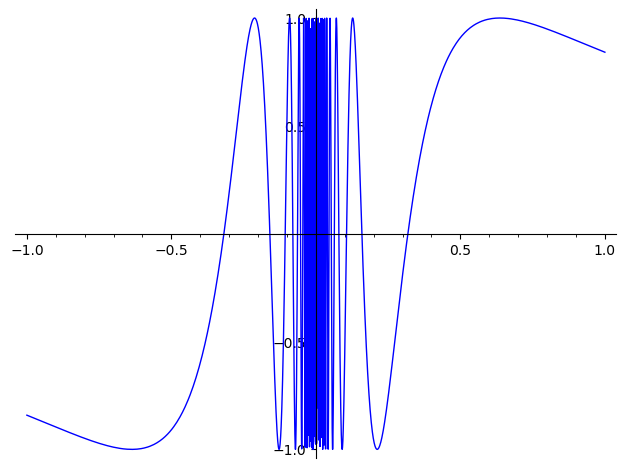

In [3]:
plot(sin_of_recip(x), (x, -1, 1))

Now we apply `abs_decorator` to $x \mapsto \sin \frac{1}{x}$, storing the result in `abs_version`.

In [4]:
abs_version = abs_decorator(sin_of_recip)
abs_version

<function abs_decorator.<locals>.new_f at 0x7f429bf96980>

We plot `abs_version`. Note that it is the graph of $x \mapsto |\sin \frac{1}{x}|$.

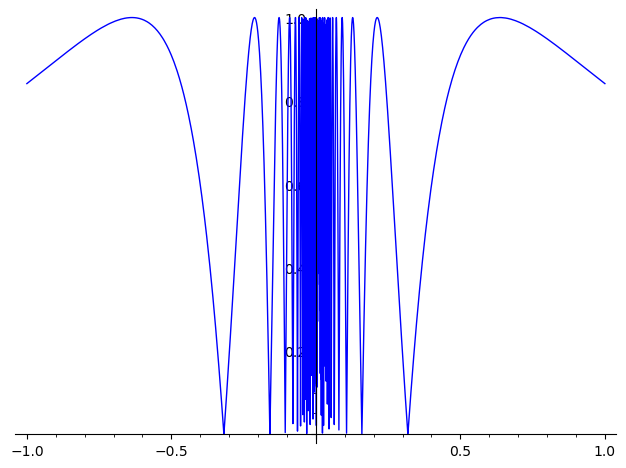

In [5]:
plot(abs_version(x), (x, -1, 1))

Python has a special syntax for applying decorators. The `@abs_decorator` below indicates that this decorator should be applied to the function `sin_of_recip2`.

In [6]:
@abs_decorator
def sin_of_recip2(x):
    return sin(1/x)

Formally what is being done is exactly what we did above. The `sin_of_recip2` function is created as defined above, but, after its definition, it is passed through `abs_decorator` and the result is stored in `sin_of_recip2`. The result is now when we apply `sin_of_recip2` we get the function $x \mapsto |\sin \frac1x|$.

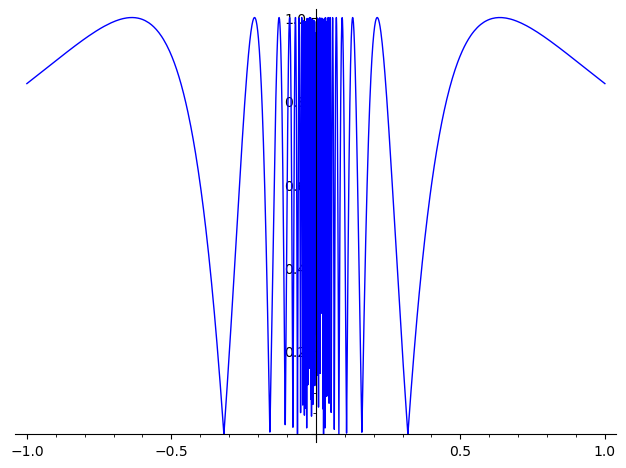

In [7]:
plot(sin_of_recip2(x), (x, -1, 1))

## Interacts

We will learn how to make interactive cells in SageMath. Most functions with default values can be made interactive.

**References:**

* There is a `SageMath` [tutorial on interactive cells](https://doc.sagemath.org/html/en/prep/Quickstarts/Interact.html).
* There are a bunch of examples on [SageMath wiki](https://wiki.sagemath.org/interact).

The function `interact` is a decorator that makes a function interactive. A simple demonstration:

In [8]:
@interact
def myplot(f=x^2):
    show(plot(f,(x,-3,3)))

Interactive function <function myplot at 0x7f429bf00540> with 1 widget
  f: EvalText(value='x^2', description='f')

Above, you should be able to edit the value of `f`, changing the function being plotted. Whenever the value of any input changes, the function is recomputed.

Here we have two inputs, both numbers. We construct the line segment from $(0,0)$ to $(x,y)$.

In [9]:
@interact
def my_line(x=2, y=3):
    show(line([(0,0), (x,y)]), aspect_ratio=1)

Interactive function <function my_line at 0x7f429bddb100> with 2 widgets
  x: IntSlider(value=2, description='x', max=6, min=-2)
  y: IntSlider(value=3, description='y', max=9, min=-3)

We can also do the above example with a vector.

In [10]:
@interact
def my_line(v=vector([3, 2])):
    show(line([(0,0), v]), aspect_ratio=1)

Interactive function <function my_line at 0x7f429bcedf80> with 1 widget
  v: EvalText(value='(3, 2)', description='v')

Here we demonstrate that you can interact with strings.

In [11]:
@interact
def say_hi(name='Benny'):
    print(f'Hi {name}!')

Interactive function <function say_hi at 0x7f429bcfc4a0> with 1 widget
  name: Text(value='Benny', description='name')

Boolean values:

In [12]:
@interact
def say_hi(truth_value = True):
    print(f'The statement is {truth_value}!')

Interactive function <function say_hi at 0x7f429bcfc540> with 1 widget
  truth_value: Checkbox(value=True, description='truth_value')

### Use of pairs:

If a pair is used, the first item will be the label, and the second will be the default value. For example:

In [13]:
@interact
def say_hi(truth_value = ('Truth value', True)):
    print(f'The statement is {truth_value}!')

Interactive function <function say_hi at 0x7f429bced260> with 1 widget
  truth_value: Checkbox(value=True, description='Truth value')

### Option not to update

The special `auto_update` variable is used to control whether the function should update automatically. Setting it to false gives a button which must be clicked to get an update:

In [14]:
@interact
def my_line(x=2, y=3, auto_update=False):
    show(line([(0,0), (x,y)]), aspect_ratio=1)

Manual interactive function <function my_line at 0x7f429bced3a0> with 2 widgets
  x: IntSlider(value=2, description='x', max=6, min=-2)
  y: IntSlider(value=3, description='y', max=9, min=-3)

## Widgets

Input arguments to interacts can be widgets, which give us some more control of how the user can input values.

### Input box

In [15]:
i = input_box(default=1, label='x')
i

EvalText(value='1', description='x', layout=Layout(max_width='81em'))

To get the value represented by a widget we can use the `get_value` method. This is what will be passed to the function using the interact.

In [16]:
i.get_value()

1

By default, Sage evaluates the string before giving access in a function. For example:

In [17]:
@interact
def compute_square(x = input_box(default=1)):
    print(f'The square of x is {x^2}')

Interactive function <function compute_square at 0x7f429b98f740> with 1 widget
  x: EvalText(value='1', description='x', layout=Layout(max_width='81em'))

Note that the `@interact` decorator will alter the inputs to the function; instead of calling the function with a widget, it will be called with the value it produces.

Strings are evaluated into sage expressions with the `sage_eval` function. This function treats a string as input to sage, and is demonstrated below:

In [18]:
sage_eval('pi^2')

pi^2

If you want to get access to the string without passing through `sage_eval`, you can set `type=str`. This can lead to some funny arithmetic:

In [19]:
@interact
def double_a_string(x = input_box(default=3, type=str)):
    print(f'The double of x={x} is {2*x}')

Interactive function <function double_a_string at 0x7f429bbf9b20> with 1 widget
  x: TransformText(value='3', description='x', layout=Layout(max_width='81em'))

Observe that this type of `input_box` as a string as its value. (Doubling a string appends the string to itself.)

In [20]:
i = input_box(default=3, type=str)
i.get_value()

'3'

### Sliders

The numbers $0$ and $1$ below are minimum and maximum values respectively. The number `1/1000` is the step size. The initial value is `1/2`.

In [21]:
slider(0, 1, 1/1000, default=1/2, label='n value')

SelectionSlider(description='n value', index=500, options=(0, 1/1000, 1/500, 3/1000, 1/250, 1/200, 3/500, 7/1000, 1/125, 9/1000, 1/100, 11/1000, 3/250, 13/1000, 7/500, 3/200, 2/125, 17/1000, 9/500, 19/1000, 1/50, 21/1000, 11/500, 23/1000, 3/125, 1/40, 13/500, 27/1000, 7/250, 29/1000, 3/100, 31/1000, 4/125, 33/1000, 17/500, 7/200, 9/250, 37/1000, 19/500, 39/1000, 1/25, 41/1000, 21/500, 43/1000, 11/250, 9/200, 23/500, 47/1000, 6/125, 49/1000, 1/20, 51/1000, 13/250, 53/1000, 27/500, 11/200, 7/125, 57/1000, 29/500, 59/1000, 3/50, 61/1000, 31/500, 63/1000, 8/125, 13/200, 33/500, 67/1000, 17/250, 69/1000, 7/100, 71/1000, 9/125, 73/1000, 37/500, 3/40, 19/250, 77/1000, 39/500, 79/1000, 2/25, 81/1000, 41/500, 83/1000, 21/250, 17/200, 43/500, 87/1000, 11/125, 89/1000, 9/100, 91/1000, 23/250, 93/1000, 47/500, 19/200, 12/125, 97/1000, 49/500, 99/1000, 1/10, 101/1000, 51/500, 103/1000, 13/125, 21/200, 53/500, 107/1000, 27/250, 109/1000, 11/100, 111/1000, 14/125, 113/1000, 57/500, 23/200, 29/250, 11

Sliders can also choose from a list of values:

In [22]:
squares = [n^2 for n in range(10)]
slider(squares, default=9, label='square')

SelectionSlider(description='square', index=3, options=(0, 1, 4, 9, 16, 25, 36, 49, 64, 81), value=9)

In [23]:
@interact
def roots(x = slider(squares, default=49, label='square')):
    print(f'x = {x}')
    print(f'The roots of {x} are {sqrt(x)} and {-sqrt(x)}')

Interactive function <function roots at 0x7f429b8a5800> with 1 widget
  x: SelectionSlider(description='square', index=7, options=(0, 1, 4, 9, 16, 25, 36, 49, 64, 81), value=49)

### Range slider

A range slider lets you select an interval, like $(30, 60) \subset \mathbb R$. For example:

In [24]:
range_slider(0,100,1,(50,90),label='Interval')

TransformIntRangeSlider(value=(50, 90), description='Interval')

In [25]:
@interact
def print_range(r = range_slider(0,100,1,(50,90),label='Interval')):
    print(r)
    print(type(r))

Interactive function <function print_range at 0x7f429bddaac0> with 1 widget
  r: TransformIntRangeSlider(value=(50, 90), description='Interval')

You can see above that a range slider produces a tuple.

### Checkboxes:

In [26]:
checkbox(True, label='boolean')

Checkbox(value=True, description='boolean')

In [27]:
@interact
def boolean_printer(b = checkbox(True, label='boolean')):
    print(b)

Interactive function <function boolean_printer at 0x7f42a40b3560> with 1 widget
  b: Checkbox(value=True, description='boolean')

### Selector

By default, `selector` displays a dropdown that lets you pick a value.

In [28]:
letters = [chr(ord('a') + i) for i in range(26)]
selector(letters, default='x', label='letter')

Dropdown(description='letter', index=23, options=('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'), value='x')

You can also display buttons instead.

In [29]:
letters = [chr(ord('a') + i) for i in range(26)]
selector(letters, default='x', label='letter', buttons=True)

ToggleButtons(description='letter', index=23, options=('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'), value='x')

In [30]:
nums = list(range(10))
print(nums)
@interact
def square(num = selector(nums, default=5, label='letter', buttons=True)):
    print(f'The square  of {num} is {num^2}')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Interactive function <function square at 0x7f429b6f4220> with 1 widget
  num: ToggleButtons(description='letter', index=5, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=5)

### Input grid

Allows you to organize a rectangular box of numbers. For example:

In [31]:
input_grid(2, 3, 
           default=[ [1,2,3],
                     [4,5,6]], label='values')

Grid(value=[[1, 2, 3], [4, 5, 6]], children=(Label(value='values'), VBox(children=(EvalText(value='1', layout=Layout(max_width='5em')), EvalText(value='4', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='2', layout=Layout(max_width='5em')), EvalText(value='5', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='3', layout=Layout(max_width='5em')), EvalText(value='6', layout=Layout(max_width='5em'))))))

In a simple interact:

In [32]:
@interact
def box_values(box = input_grid(2, 3, 
                                default=[ [1,2,3],
                                          [4,5,6]], label='values')):
    print(box)

Interactive function <function box_values at 0x7f42a408e160> with 1 widget
  box: Grid(value=[[1, 2, 3], [4, 5, 6]], children=(Label(value='values'), VBox(children=(EvalText(value='1', layout=Layout(max_width='5em')), EvalText(value='4', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='2', layout=Layout(max_width='5em')), EvalText(value='5', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='3', layout=Layout(max_width='5em')), EvalText(value='6', layout=Layout(max_width='5em'))))))

Note that the output is a list of lists of numbers. We can convert the list to a matrix if we wish.

In [33]:
@interact
def box_values(box = input_grid(3, 3, 
                                default=[ [1,2,3],
                                          [4,5,6],
                                          [7,8,10]], label='values')):
    m = matrix(box)
    print(m)
    print(f'The determinant of m is {m.det()}')

Interactive function <function box_values at 0x7f429ba0eca0> with 1 widget
  box: Grid(value=[[1, 2, 3], [4, 5, 6], [7, 8, 10]], children=(Label(value='values'), VBox(children=(EvalText(value='1', layout=Layout(max_width='5em')), EvalText(value='4', layout=Layout(max_width='5em')), EvalText(value='7', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='2', layout=Layout(max_width='5em')), EvalText(value='5', layout=Layout(max_width='5em')), EvalText(value='8', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='3', layout=Layout(max_width='5em')), EvalText(value='6', layout=Layout(max_width='5em')), EvalText(value='10', layout=Layout(max_width='5em'))))))

### Color selector

The `color_selector` lets the user pick a color. With all the widgets above, if you want to learn more about the widget, you can check the documentation with `color_selector?`.

In [34]:
color_selector?

Signature:      color_selector(default=(0, 0, 1), label=None, widget=None, hide_box=False)
Docstring:     
   A widget for choosing a color.

   INPUT:

   * "default" -- initial value

   * "label" -- optional label

   * "hide_box" -- (boolean) if True, do not show the textbox

   EXAMPLES:

      sage: from sage.repl.ipython_kernel.all_jupyter import color_selector
      sage: w = color_selector("orange", label="color me"); w
      SageColorPicker(value='#ffa500', description='color me')
      sage: w.get_interact_value()
      RGB color (1.0, 0.6470588235294118, 0.0)
      sage: color_selector(Color(0.1, 0.2, 0.3))
      SageColorPicker(value='#19334c')
Init docstring: Initialize self.  See help(type(self)) for accurate signature.
File:           ~/Git/sage/sage/src/sage/repl/ipython_kernel/widgets_sagenb.py
Type:           function

Here is a simple selector, with a default orange:

In [35]:
color_selector("orange", label="color me")

SageColorPicker(value='#ffa500', description='color me')

We can change the color of this plot:

In [36]:
var('x')

@interact
def plot_sin(c = color_selector("orange", label="color me")):
    return plot(sin(x), color=c)

Interactive function <function plot_sin at 0x7f429a542ac0> with 1 widget
  c: SageColorPicker(value='#ffa500', description='color me')

## Examples

### Problem 1

Create an interact that allows the user to select a function $f(x)$ and a point $x_0$. The interact should display the graph of $f$ over $[0, 1]$ in blue and display the tangent line to the graph at $\big(x_0, f(x_0)\big)$ in red.

In order to address this problem, we try to accomplish the task with some example first. Here we choose an `f` and an `x_0`:

In [37]:
f = sin(10*x)
x_0 = 3/4

Note that we use `f = sin(10*x)` because this is what we would use as an argument in our interact. We find it easier to work with a function than an expression, so we can fix this with:

In [38]:
f(x) = f

To compute the slope of the tangent line, we need the derivative:

In [39]:
df = f.derivative(x)
df

x |--> 10*cos(10*x)

Now we can compute the derivative at `x_0`. This will be the slope of our tangent line.

In [40]:
m = df(x_0)
m

10*cos(15/2)

We use point-slope form to write an equation for the tangent line:

In [41]:
l(x) = m*(x-x_0) + f(x_0)
l

x |--> 5/2*(4*x - 3)*cos(15/2) + sin(15/2)

We will plot several objects. First the graph of `f`:

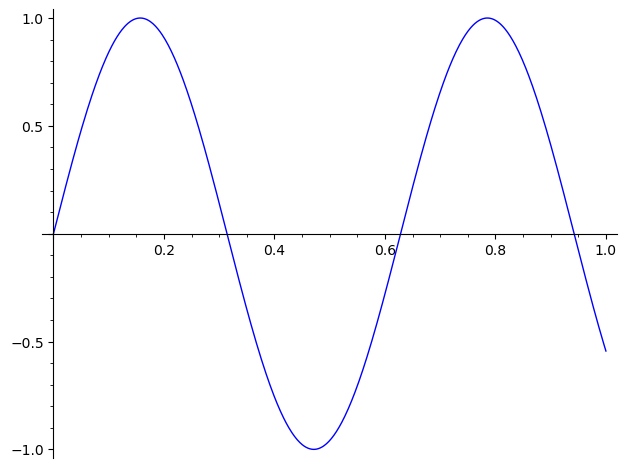

In [42]:
plt1 = plot(f, xmin=0, xmax=1, color='blue')
plt1

Then we add the tangent line:

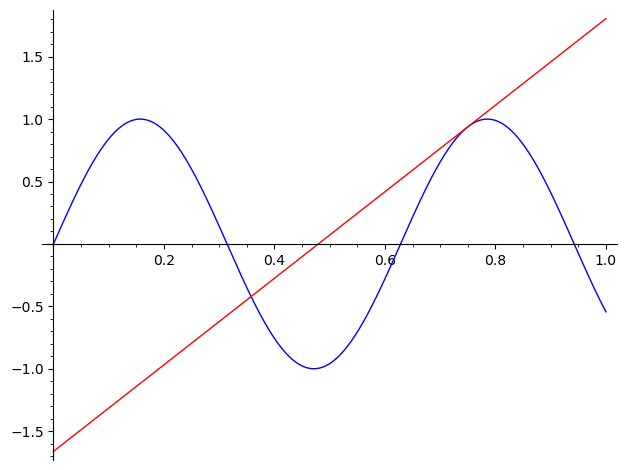

In [43]:
plt2 = plot(l, xmin=0, xmax=1, color='red')
plt1 + plt2

Last, we might include the point:

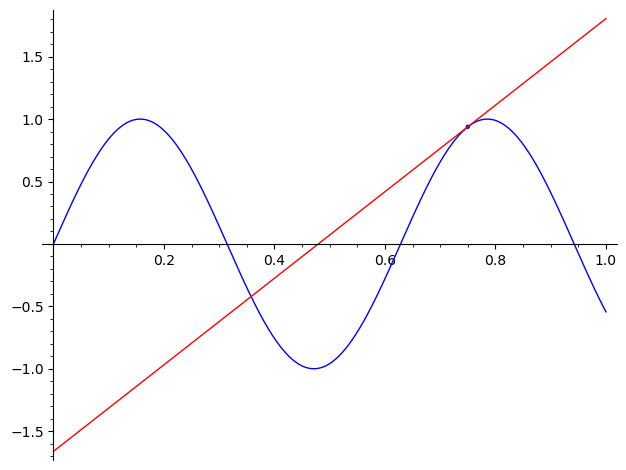

In [44]:
plt3 = point([(x_0, f(x_0))])
plt1 + plt2 + plt3

We can then put this into our interact:

In [45]:
@interact
def tangent_line(f = sin(10*x), x_0=3/4):
    f(x)=f
    df = f.derivative(x)
    m = df(x_0)
    l(x) = m*(x-x_0) + f(x_0)
    plt1 = plot(f, xmin=0, xmax=1, color='blue')
    plt2 = plot(l, xmin=0, xmax=1, color='red')
    plt3 = point([(x_0, f(x_0))])
    return plt1+plt2+plt3

Interactive function <function tangent_line at 0x7f429a486700> with 2 widgets
  f: EvalText(value='sin(10*x)', description='f')
  x_0: FloatSlider(value=0.75, description='x_0', max=2.25, min=-0.75)

Now we make some improvements:

* As we vary the parameter, the graph moves in a jarring way. We'd like the bounding box to be controled by the graph of `f` and for us to see whatever portion of the line is contained in this box. We can fix this by using bounding box data from the plot of `f` to create a bounding box for our graph of the tangent line. Bounding box data for a plt like `plt1` is accessible via `plt1.xmin()`, `plt1.xmax()`, `plt1.ymin()` and `plt1.ymax()`.
* The default slider for `x_0 = 3/4` seems to vary between `-0.75` and `2.25`. But it doesn't make much sense to choose a point outside of the interval $[0, 1]$. We can create a `slider` that will do a better job. Another possibility might be to use an `input_box`.

These issues are fixed in the version below:

In [46]:
@interact
def tangent_line(
        f = sin(10*x), 
        x_0=slider(0, 1, 0.001, default=1/2, label=r'$x_0$')
):
    f(x)=f
    df = f.derivative(x)
    m = df(x_0)
    l(x) = m*(x-x_0) + f(x_0)
    plt1 = plot(f, xmin=0, xmax=1, color='blue')
    plt2 = plot(l, xmin=0, xmax=1, ymin=plt1.ymin(), ymax=plt1.ymax(), color='red')
    plt3 = point([(x_0, f(x_0))],zorder=10, size=20, color='black')
    return plt1+plt2+plt3

Interactive function <function tangent_line at 0x7f429a58df80> with 2 widgets
  f: EvalText(value='sin(10*x)', description='f')
  x_0: TransformFloatSlider(value=0.5, description='$x_0$', max=1.0, step=0.001)

### Problem 2

Five points in the plane determine a *quadric curve* passing through them, the zero set of a degree two polynomial equation of the form
$$a x^2 + b xy+ c x + dy^2 + e y + f = 0,$$
with $a$, $b$, $c$, $d$, $e$, and $f$ constants.

Find this curve and plot it together with the $5$ points. Make it interactive.

We will use an `input_grid` to get the points. We'll use columns for our points (otherwise it would take up $5$ rows).

In [47]:
points = input_grid(2, 5, 
                    default=[ [1,8,3,9,5],
                              [4,8,6,2,2]], label='points')
points

Grid(value=[[1, 8, 3, 9, 5], [4, 8, 6, 2, 2]], children=(Label(value='points'), VBox(children=(EvalText(value='1', layout=Layout(max_width='5em')), EvalText(value='4', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='8', layout=Layout(max_width='5em')), EvalText(value='8', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='3', layout=Layout(max_width='5em')), EvalText(value='6', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='9', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='5', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em'))))))

When the data is passed to our function through `@interact` we will be given the following type of value:

In [48]:
points = points.get_value()
points

[[1, 8, 3, 9, 5], [4, 8, 6, 2, 2]]

This is a list of five $x$-coordinates followed by a list of five $y$-coordinates. Let us organize the points into five points.

In [49]:
pts = []
for i in range(5):
    pt = (points[0][i], points[1][i])
    pts.append(pt)
pts

[(1, 4), (8, 8), (3, 6), (9, 2), (5, 2)]

We plot the points below. (We set `zorder=10` so it appears on top.)

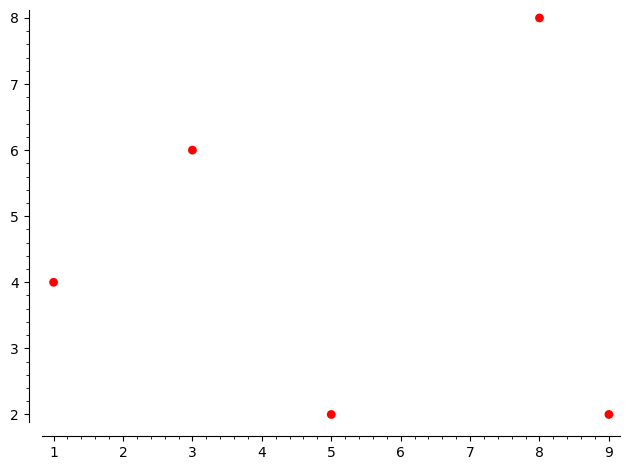

In [50]:
plt1 = point(pts, color='red',zorder=10, size=40)
plt1

Now let us define a general version of the quadratic polynomial.

In [51]:
a,b,c,d,e,f = var('a b c d e f')
Q(x,y) = a*x^2 + b*x*y + c*x + d*y^2 + e*y + f
Q

(x, y) |--> a*x^2 + b*x*y + d*y^2 + c*x + e*y + f

We get an equation that must hold from each point:

In [52]:
eqns = [Q(*pts[i])==0 for i in range(5)]
eqns

[a + 4*b + c + 16*d + 4*e + f == 0,
 64*a + 64*b + 8*c + 64*d + 8*e + f == 0,
 9*a + 18*b + 3*c + 36*d + 6*e + f == 0,
 81*a + 18*b + 9*c + 4*d + 2*e + f == 0,
 25*a + 10*b + 5*c + 4*d + 2*e + f == 0]

Observe that this is a homogeneous system of $5$ linear equations in $6$ variables. Therefore, there is at least a $1=6-5$-dimensional solution set, which is a linear subspace of $\mathbb R^6$.

We can solve the system:

In [53]:
solutions = solve(eqns,[a,b,c,d,e,f], solution_dict=True)
solutions

[{a: 1/148*r1,
  b: -19/888*r1,
  c: -23/444*r1,
  d: 29/444*r1,
  e: -425/888*r1,
  f: r1}]

We see there is only one solution family, which has a single free variable. We extract the single solution:

In [54]:
sol = solutions[0]

We can extract the variables in a symbolic expression with the `.variables()` method. For example:

In [55]:
sol[a].variables()

(r1,)

The following will extract all the variables and place them in a set:

In [56]:
free_variables = set()
for variable, expression in sol.items():
    free_variables = free_variables.union(expression.variables())
free_variables

{r1}

We want one solution, so we will choose values for these free variables. We don't want to choose zero, or else all our values will be zero. The choice of one for all values should be okay. Here is a dictionary that represents this choice:

In [57]:
free_variable_values = {variable:1 for variable in free_variables}
free_variable_values

{r1: 1}

Now let's build a new solution dictionary that substutes these free variables.

In [58]:
new_sol = {}
for variable, expression in sol.items():
    new_expression = expression.subs(free_variable_values)
    new_sol[variable] = new_expression
new_sol

{a: 1/148, b: -19/888, c: -23/444, d: 29/444, e: -425/888, f: 1}

Great. Now we have an actual function to graph the zero set of:

In [59]:
Q_new = Q.subs(new_sol)
Q_new

(x, y) |--> 1/148*x^2 - 19/888*x*y + 29/444*y^2 - 23/444*x - 425/888*y + 1

To plot it, we can try a contour plot:

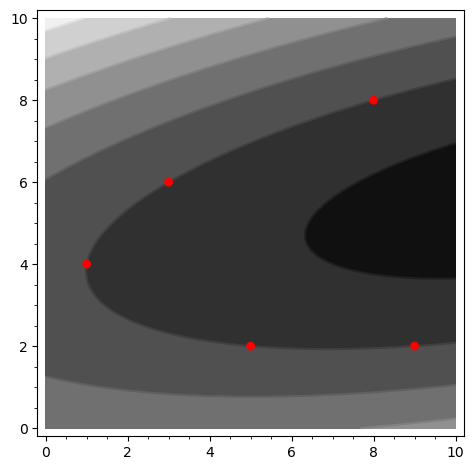

In [60]:
contour_plot(Q_new, (x, 0, 10), (y, 0, 10)) + plt1

We are hoping to draw just the zero set. We can use `contour_plot` but it requires some customization. We read the documentation (`contour_plot?`) and after some experimentation settle on the following:

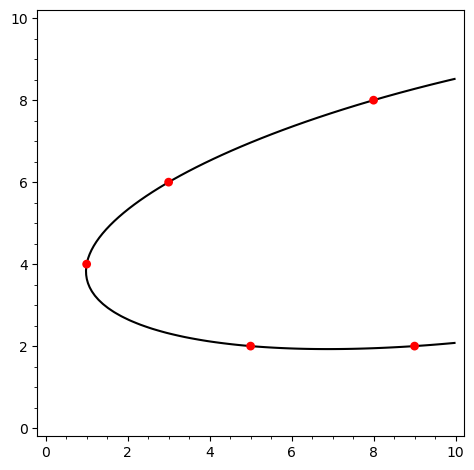

In [61]:
contour_plot(Q_new, (x, 0, 10), (y, 0, 10), fill=False, contours=[0]) + plt1

We now assemble the above into an interactive plot:

In [62]:
@interact
def plot_curve(points = input_grid(2, 5, 
                                   default=[ [1,8,3,9,5],
                                             [4,8,6,2,2]], label='points')):
    pts = []
    for i in range(5):
        pt = (points[0][i], points[1][i])
        pts.append(pt)
    pts

    # We plot the points below. (We set `zorder=10` so it appears on top.)
    plt1 = point(pts, color='red',zorder=10, size=40)

    # Now let us define a general version of the quadratic polynomial.
    a,b,c,d,e,f = var('a b c d e f')
    Q(x,y) = a*x^2 + b*x*y + c*x + d*y^2 + e*y + f

    # We get an equation that must hold from each point:
    eqns = [Q(*pts[i])==0 for i in range(5)]
    # We can solve the system:
    solutions = solve(eqns,[a,b,c,d,e,f], solution_dict=True)
    sol = solutions[0]
    # The following will extract all the variables and place them in a set:
    free_variables = set()
    for variable, expression in sol.items():
        free_variables = free_variables.union(expression.variables())
    free_variables

    # We want one solution, so we will choose values for these free variables.
    free_variable_values = {variable:1 for variable in free_variables}
    # Now let's build a new solution dictionary that substutes these free variables.
    new_sol = {}
    for variable, expression in sol.items():
        new_expression = expression.subs(free_variable_values)
        new_sol[variable] = new_expression
    new_sol

    # Great. Now we have an actual function to graph the zero set of:
    Q_new = Q.subs(new_sol)
    # We plot the zero contour below:
    plt2 = contour_plot(Q_new, (x, 0, 10), (y, 0, 10), fill=False, contours=[0])

    # Return the combined plot
    return plt1 + plt2

Interactive function <function plot_curve at 0x7f429a05bd80> with 1 widget
  points: Grid(value=[[1, 8, 3, 9, 5], [4, 8, 6, 2, 2]], children=(Label(value='points'), VBox(children=(EvalText(value='1', layout=Layout(max_width='5em')), EvalText(value='4', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='8', layout=Layout(max_width='5em')), EvalText(value='8', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='3', layout=Layout(max_width='5em')), EvalText(value='6', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='9', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='5', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em'))))))